<a href="https://colab.research.google.com/github/mimiachiu/Deep-Learning-with-Python-Book/blob/master/Ch05_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
pip install keras

In [ ]:
#此範例需要先下載以下資料，並上傳到google雲端硬碟，使用雲端硬碟需要先授權
#https://www.kaggle.com/c/dogs-vs-cats/data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#貓狗圖片資料夾存放位置Colab Notebooks/Deep Learning with Python/dogs-vs-cats
initial_dir = '/content/gdrive/My Drive/Colab Notebooks/Deep Learning with Python/dogs-vs-cats'

In [ ]:
import os, shutil

original_dataset_dir = initial_dir + '/train/train'

In [ ]:
#建立所需資料夾
base_dir = initial_dir + '/cats_and_dogs_small'
if not os.path.isdir(base_dir): os.mkdir(base_dir)

In [ ]:
train_dir = os.path.join(base_dir, 'train')
if not os.path.isdir(train_dir): os.mkdir(train_dir)

In [ ]:
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.isdir(validation_dir): os.mkdir(validation_dir)

In [ ]:
test_dir = os.path.join(base_dir, 'test')
if not os.path.isdir(test_dir): os.mkdir(test_dir)

In [ ]:
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.isdir(train_cats_dir): os.mkdir(train_cats_dir)

In [ ]:
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.isdir(train_dogs_dir): os.mkdir(train_dogs_dir)

In [ ]:
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.isdir(validation_cats_dir): os.mkdir(validation_cats_dir)

In [ ]:
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.isdir(validation_dogs_dir): os.mkdir(validation_dogs_dir)

In [ ]:
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.isdir(test_cats_dir): os.mkdir(test_cats_dir)

In [ ]:
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.isdir(test_dogs_dir): os.mkdir(test_dogs_dir)

In [ ]:
#複製圖片到各資料夾(此部分使用雲端硬碟需要執行較久時間)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('訓練用的貓圖片張數：', len(os.listdir(train_cats_dir)))
print('訓練用的狗圖片張數：', len(os.listdir(train_dogs_dir)))
print('驗證用的貓圖片張數：', len(os.listdir(validation_cats_dir)))
print('驗證用的狗圖片張數：', len(os.listdir(validation_dogs_dir)))
print('測試用的貓圖片張數：', len(os.listdir(test_cats_dir)))
print('測試用的狗圖片張數：', len(os.listdir(test_dogs_dir)))

訓練用的貓圖片張數： 1000
訓練用的狗圖片張數： 1000
驗證用的貓圖片張數： 500
驗證用的狗圖片張數： 500
測試用的貓圖片張數： 500
測試用的狗圖片張數： 500


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
#建立神經網路
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
#資料預處理並建立圖片產生器
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
#開始訓練
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Epoch 1/30
100/100 [==============================] - 23s 228ms/step - loss: 0.6966 - acc: 0.5245 - val_loss: 0.6830 - val_acc: 0.5070
Epoch 2/30
100/100 [==============================] - 16s 157ms/step - loss: 0.6652 - acc: 0.6015 - val_loss: 0.6501 - val_acc: 0.6350
Epoch 3/30
100/100 [==============================] - 16s 158ms/step - loss: 0.6159 - acc: 0.6600 - val_loss: 0.6306 - val_acc: 0.6340
Epoch 4/30
100/100 [==============================] - 16s 160ms/step - loss: 0.5718 - acc: 0.7055 - val_loss: 0.5966 - val_acc: 0.6770
Epoch 5/30
100/100 [==============================] - 16s 163ms/step - loss: 0.5430 - acc: 0.7205 - val_loss: 0.6155 - val_acc: 0.6570
Epoch 6/30
100/100 [==============================] - 16s 158ms/step - loss: 0.5114 - acc: 0.7520 - val_loss: 0.5759 - val_acc: 0.6870
Epoch 7/30
100/100 [==============================] - 16s 160ms/step - loss: 0.4782 - acc: 0.7680 - val_loss: 0.5866 - val_acc: 0.6860
Epoch 8/30
100/100 [==============================] - 1

In [ ]:
#儲存模型
model.save(initial_dir + '/cats_and_dogs_small_1.h5')

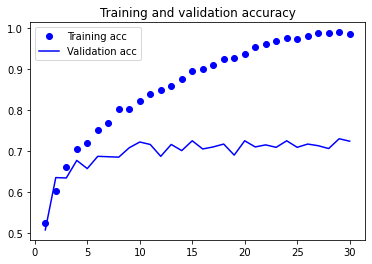

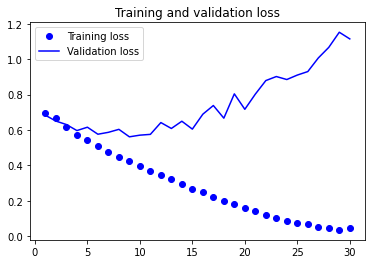

In [ ]:
#顯示訓練和驗證週期的損失值和準確度曲線
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#定義具有Dropout層的新卷積神經網路
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #加入Dropout
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
#使用資料擴增
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, 
                                   width_shift_range=0.2, height_shift_range=0.2, 
                                   shear_range=0.5, zoom_range=0.2, horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=20, class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=20, class_mode='binary')

history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=30, validation_data=validation_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 29s 288ms/step - loss: 0.6950 - acc: 0.5185 - val_loss: 0.6874 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 26s 258ms/step - loss: 0.6878 - acc: 0.5435 - val_loss: 0.6724 - val_acc: 0.5750
Epoch 3/30
100/100 [==============================] - 26s 256ms/step - loss: 0.6838 - acc: 0.5570 - val_loss: 0.6624 - val_acc: 0.5940
Epoch 4/30
100/100 [==============================] - 26s 258ms/step - loss: 0.6779 - acc: 0.5830 - val_loss: 0.6627 - val_acc: 0.5700
Epoch 5/30
100/100 [==============================] - 27s 270ms/step - loss: 0.6674 - acc: 0.5920 - val_loss: 0.6369 - val_acc: 0.6290
Epoch 6/30
100/100 [==============================] - 26s 260ms/step - loss: 0.6528 - acc: 0.6160 - val_loss: 0.6313 - val_acc: 0.6390
Epoch 7/30
100/100 [==============================] - 26s 259ms/step - loss: 0.6285 - acc: 0.6375 - val_lo

In [ ]:
#儲存模型
model.save(initial_dir + '/cats_and_dogs_small_2.h5')

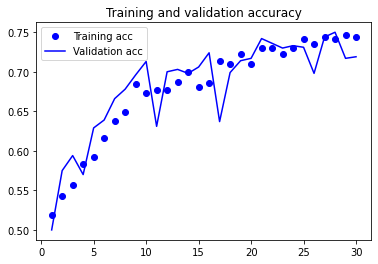

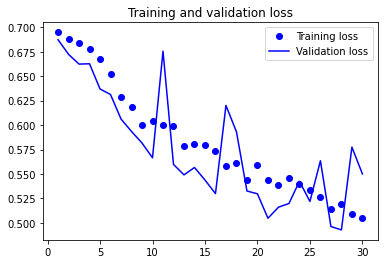

In [ ]:
#顯示訓練和驗證週期的損失值和準確度曲線
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()